User year of study table saved as user_year_of_study_table.csv


,User,Year of Study
0,User 1,Final Year
1,User 2,Second Year
2,User 3,First Year
3,User 4,First Year
4,User 5,Second Year
5,User 6,First Year
6,User 7,Placement Year
7,User 8,Second Year
8,User 9,Final Year
9,User 10,Second Year


Year of study counts table saved as year_of_study_counts.csv


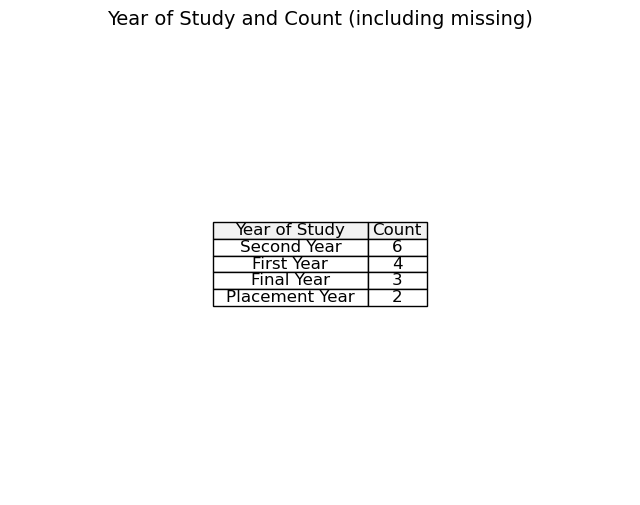

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Load the CSV file
data = pd.read_csv("TSDA8-constant-data.csv")

# Prepare the year of study table, including users with missing year
user_table = data[["rID", "yearOfStudy"]].copy()
user_table["User"] = [f"User {i+1}" for i in range(len(user_table))]
user_table["Year of Study"] = user_table["yearOfStudy"].fillna("(missing)")
user_table = user_table[["User", "Year of Study"]]

# Save the user table to CSV
user_table.to_csv("user_year_of_study_table.csv", index=False)
print("User year of study table saved as user_year_of_study_table.csv")

display(user_table)

# Count the number of people in each year of study (including missing)
year_counts = user_table["Year of Study"].value_counts(dropna=False).reset_index()
year_counts.columns = ["Year of Study", "Count"]

# Save the year counts table to CSV
year_counts.to_csv("year_of_study_counts.csv", index=False)
print("Year of study counts table saved as year_of_study_counts.csv")

# Display the table plot with enhanced styling
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis("tight")
ax.axis("off")
table = ax.table(
    cellText=year_counts.values,
    colLabels=year_counts.columns,
    loc="center",
    cellLoc="center",
    colColours=[
        "#f2f2f2",
        "#f2f2f2",
    ],
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(year_counts.columns))))
plt.title("Year of Study and Count (including missing)", fontsize=14)
plt.show()

# Note: One user in the constant data file does not have a value for year of study. This is shown as '(missing)' in the table and included in the count.

In [4]:
# Table of users and their watch type (using 'smartWatchType' column)
import numpy as np

# Load the constant data CSV if not already loaded
constant_data = pd.read_csv("TSDA8-constant-data.csv")

# Extract unique users (assuming 'rID' is the user identifier)
user_ids = constant_data["rID"].unique()
print(user_ids)
user_labels = [f"User {i+1}" for i in range(len(user_ids))]

# Use the 'smartWatchType' column for watch type
watch_types = []
for uid in user_ids:
    types = (
        constant_data[constant_data["rID"] == uid]["smartWatchType"].dropna().unique()
    )
    if len(types) == 0 or (
        len(types) == 1 and (types[0] == "" or str(types[0]).strip().lower() == "n/a")
    ):
        watch_types.append("No Smart Watch")
    else:
        # If multiple types, join them, else take the first non-empty, non-n/a value
        filtered = [t for t in types if t and str(t).strip().lower() != "n/a"]
        watch_types.append(filtered[0] if filtered else "n/a")

# Create and display the table
user_table = pd.DataFrame({"User": user_labels, "Watch Type": watch_types})
print(user_table)
display(user_table)

# Save the user table to CSV
user_table.to_csv("user_watch_type_table.csv", index=False)
print("User watch type table saved as user_watch_type_table.csv")

['ac437c68-8004-44e3-b040-d3df290640e7'
 'f81216e0-6bd4-4898-a2b4-93221eb6f9f8'
 '59202f98-62df-4ef3-b635-30c59c67c14a'
 '854e7492-4d0e-40be-949e-8c6c9481361f'
 '8900446e-b017-412c-8e30-de0653f2c47e'
 '6cc7d6ce-bcc4-4ad1-bed4-a56b9a89c322'
 '367e733a-ee38-4cf8-9a62-d7c27f376dfb'
 '566ec466-0ac4-4443-88c6-856c08611bb9'
 '3b91ab91-7c34-4d54-87e5-09348bc27e68'
 '6e040781-ab14-475e-8e7f-787f8763cc1f'
 'ca282e93-a3d2-4ad1-aa0b-07c8a10dca93'
 '40fadbed-355e-46c6-8e2c-fc3094f7ea3c'
 '8eb700ae-aa48-45f2-8d34-f75d3a114b7d'
 'ddbe2b73-6918-4023-9b1a-25a4274567c8'
 '493e0cfb-f7a5-4ce8-9c67-d699786ce19b']
       User                       Watch Type
0    User 1                   No Smart Watch
1    User 2                   No Smart Watch
2    User 3                   No Smart Watch
3    User 4                   No Smart Watch
4    User 5                   No Smart Watch
5    User 6                   No Smart Watch
6    User 7  Apple Watch SE (2nd generation)
7    User 8  Apple Watch SE (1st genera

,User,Watch Type
0,User 1,No Smart Watch
1,User 2,No Smart Watch
2,User 3,No Smart Watch
3,User 4,No Smart Watch
4,User 5,No Smart Watch
5,User 6,No Smart Watch
6,User 7,Apple Watch SE (2nd generation)
7,User 8,Apple Watch SE (1st generation)
8,User 9,No Smart Watch
9,User 10,Apple Watch Series 7


User watch type table saved as user_watch_type_table.csv
